### Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

# Control Flow:
* Data Analysis
* Feature Engineering
* Feature Selection & Dimensions Reduction
* ML/Dl Model Building 

# Data Analysis
* Exploring the dataset

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
dataset = pd.read_csv("train.csv")

# displaying the shape of the dataset
print("Shape of the Dataset : {}".format(dataset.shape))
print("Number of Columns in the Dataset : {}".format(dataset.shape[1]))
print("Number of Rows in the Dataset : {}".format(dataset.shape[0]))

# Understanding the Number of Numeric and Categorical features in dataset
numeric_features = dataset.select_dtypes(include = [np.number])
categoric_features = dataset.select_dtypes(exclude = [np.number])
print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
print("Number of Categorical Features : {}".format(categoric_features.shape[1]))

# Understanding the dataset
print("Information of the Dataset : {}".format(dataset.info(verbose = False, memory_usage = "deep")))

# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dataset.describe(include = "all").transpose()

Shape of the Dataset : (1460, 81)
Number of Columns in the Dataset : 81
Number of Rows in the Dataset : 1460
Number of Numerical Features : 38
Number of Categorical Features : 43
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 3.9 MB
Information of the Dataset : None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460,NaN,NaN,NaN,6.32192,2.70363,1,5,6,8,12
YrSold,1460,NaN,NaN,NaN,2007.82,1.3281,2006,2007,2008,2009,2010
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# looking at the dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


AxesSubplot(0.125,0.125;0.775x0.755)


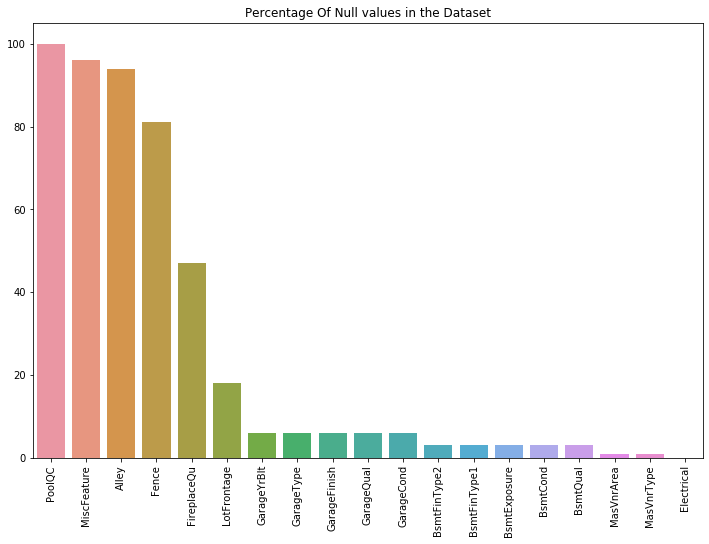

In [4]:
# My function to check the percentage of missing values
def null_check(dataset):
    null_per = (dataset.isnull().sum() / len(dataset)) * 100
    try:
        # dropping null_per which is equal to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        
        # Making the bar plot of the Null values
        plt.figure(figsize = (12,8))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.title("Percentage Of Null values in the Dataset")
        plt.xticks(rotation = "90")
        print(null_plot)
        
    except:
        print("There is NO null values in the dataset")
        print("Returning the Dataset...")
        return dataset

null_check(dataset)

In [5]:
# Dropping some High Null Columns
dataset.drop(columns= ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "Id"], axis= 1, inplace = True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


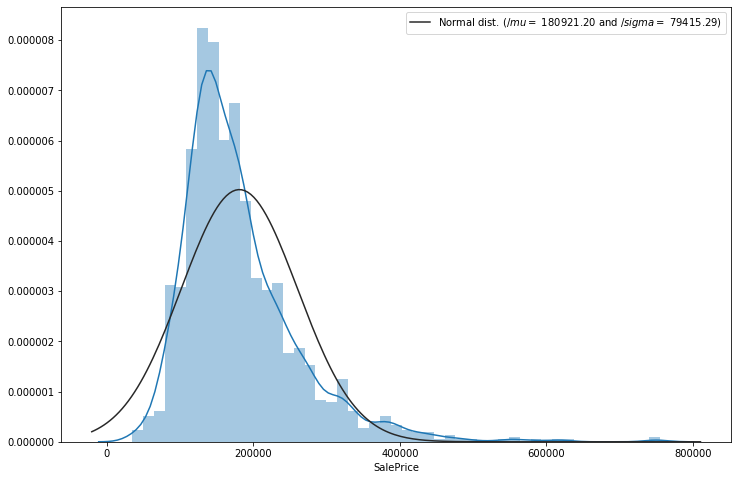

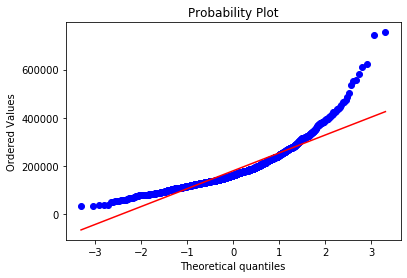

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)), (74160.16474519415, 180921.19589041095, 0.9319665641512986))


In [6]:
# Checking the distribution of the Target
def check_target_distribution(target):
    from scipy import stats
    
    plt.figure(figsize = (12,8))
    plot1 = sns.distplot(target , fit = stats.norm)
    
    # getting the params
    (mu, sigma) = stats.norm.fit(target)
    
    # legenf of the distribution
    plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
    # making the QQ plot / Probability plot 
    fig = plt.figure()
    plot2 = stats.probplot(target, plot = plt)
    plt.show()
    
    print(plot1)
    print(plot2)

check_target_distribution(dataset["SalePrice"])

* Thus, the distribution of the target is not Normal. Therefore, I will change the distribution of the target

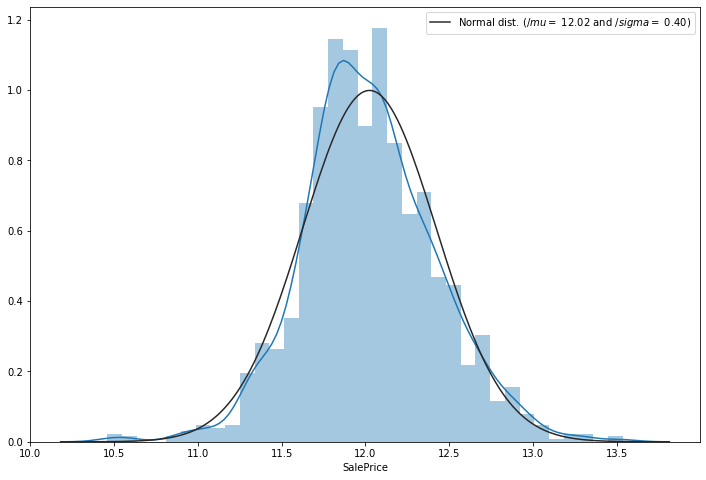

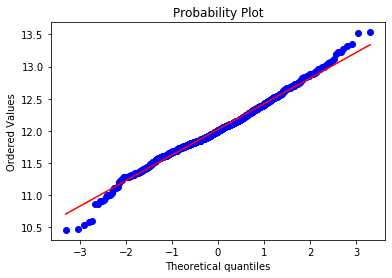

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
       13.5211395 , 13.53447303])), (0.39826223081618867, 12.024050901109383, 0.9953761475636614))


In [7]:
# Checking for Log Distribution
def log_distribution(target):
    from scipy import stats
    target = np.log(target)
    
    plt.figure(figsize = (12,8))
    plot1 = sns.distplot(target , fit = stats.norm)
    
    # getting the params
    (mu, sigma) = stats.norm.fit(target)
    
    # legenf of the distribution
    plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
    # making the QQ plot / Probability plot 
    fig = plt.figure()
    plot2 = stats.probplot(target, plot = plt)
    plt.show()
    
    print(plot1)
    print(plot2)

log_distribution(dataset["SalePrice"])

In [8]:
# Changing the target to log form
dataset["SalePrice"] = np.log(dataset["SalePrice"])
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


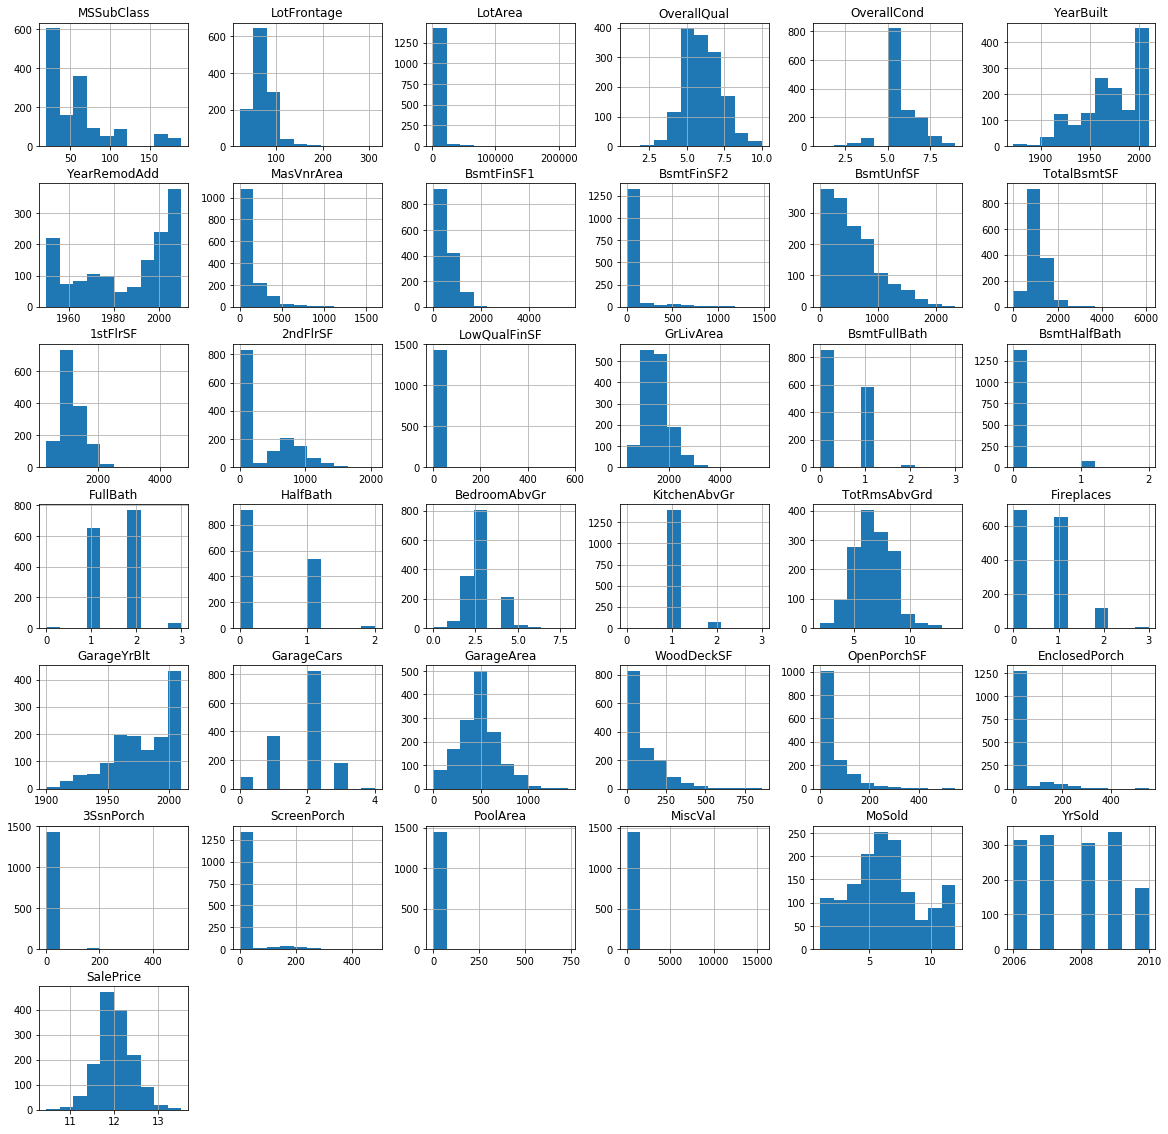

In [9]:
# checking the distribution of the dataset
def check_distribution(dataset):
    c_data = dataset.copy()
    c_data.hist(figsize = (20,20))
    plt.show()
    
check_distribution(dataset)

* Thus, We dom't have normal distribution of the dataset except SalePrice{which I converted in log form}
* For applying linear Ml model, it is important to have normal distribution of the dataset 

Number of Correrated features: 5
List of Correrated Features: ['GarageYrBlt', '1stFlrSF', 'GarageArea', 'SalePrice', 'TotRmsAbvGrd']


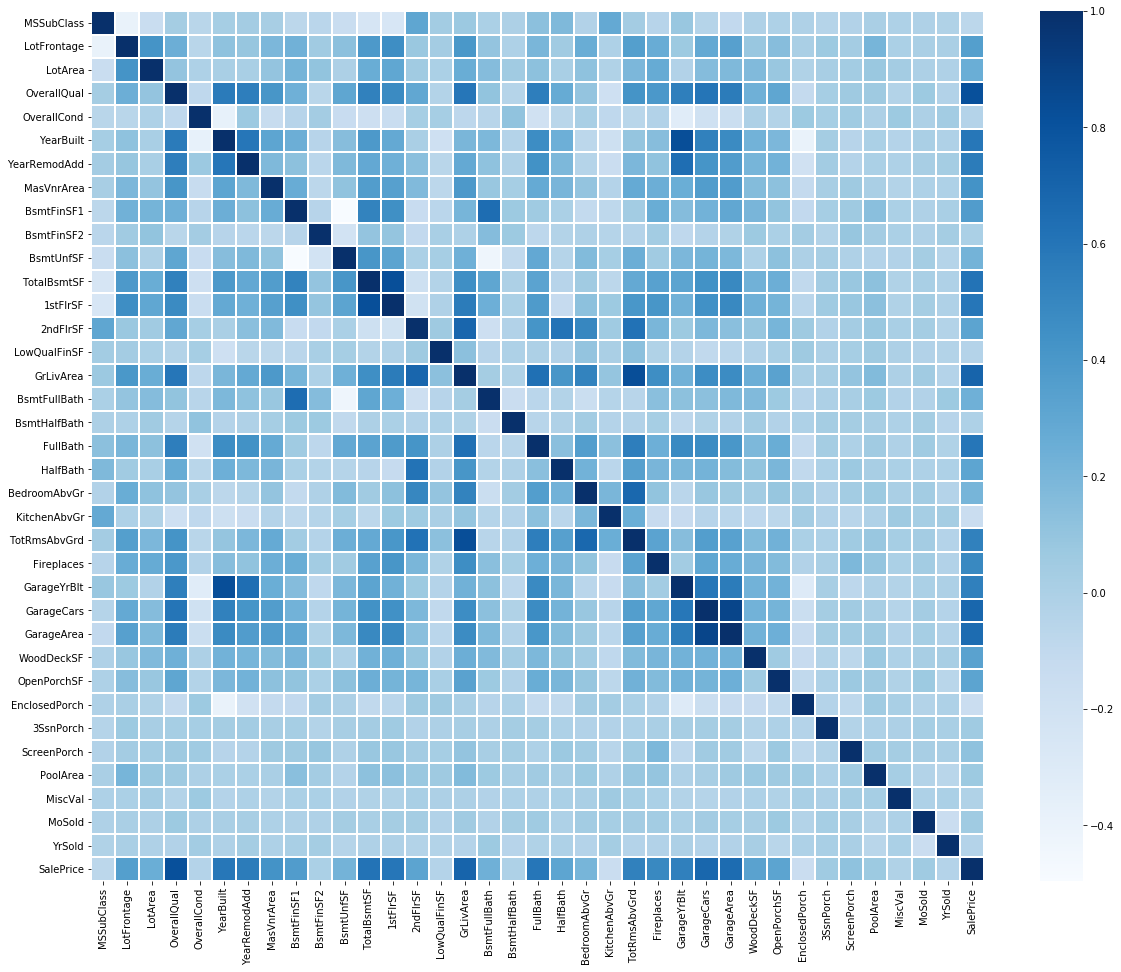

In [10]:
# Understanding the Correration-Coefficient
def correration_coefficient(dataset, figsize, annot):
    corr_matrix = dataset.corr()
    plt.figure(figsize = figsize)
    
    # making the heatmap
    corr_map = sns.heatmap(data = corr_matrix,
                           annot = annot,
                           cmap = "Blues",
                           fmt = "g",
                           linewidths = 1,
                           annot_kws = {"size": 16})
    return corr_map




def select_correration(dataset, threshold):
    # making a set
    corr_set = set()
    
    # making a corr matrix
    corr_matrix = dataset.corr()
    
    # select value under some threshold
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                matrix = corr_matrix.columns[i]
                
                # adding the values in set
                corr_set.add(matrix)
    
    print("Number of Correrated features: {}".format(len(corr_set)))
    print("List of Correrated Features: {}".format(list(corr_set)))

    
    
corr_plot = correration_coefficient(dataset, (20,16) ,False)
correrated_features = select_correration(dataset, 0.8)

# Feature Engineering
* Missing Values
* Encoding
* Diagnostic Plots
* Outliers Treatment
* Scalling

In [11]:
# Computing the Missing values
def compute_missing_values(dataset):
    
    # Since the data is long, I will drop the missing values
    filtered_dataset = dataset.copy()
    filtered_dataset = filtered_dataset.dropna(axis = 0)
    
    print("Shpae of the Inputted dataset : {}".format(dataset.shape))
    print("Shape of the filtered dataset : {}".format(filtered_dataset.shape))
    
    return filtered_dataset

dataset = compute_missing_values(dataset)        
dataset.head()

Shpae of the Inputted dataset : (1460, 75)
Shape of the filtered dataset : (1094, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [12]:
# Cardinality of the dataset
def check_cardinality(dataset):
    categorical_features = dataset.select_dtypes(exclude = [np.number])
    
    for col in categorical_features:
        cardinality = len(pd.Index(categorical_features[col]).value_counts())
        print(categorical_features[col].name + " : " + str(cardinality))

check_cardinality(dataset)

#pip install feature-engine

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 1
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 6
BldgType : 5
HouseStyle : 8
RoofStyle : 5
RoofMatl : 7
Exterior1st : 14
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 4
Foundation : 5
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 6
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [13]:
# Encoding the Categorical features
def encoding(dataset):
    
    # Selecting only the Categorical features
    variables = dataset.select_dtypes(exclude = [np.number])
    variables = list(variables)
    
    from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
    encoder = OrdinalCategoricalEncoder(encoding_method= "arbitrary",
                                       variables = variables)
    encoder.fit(dataset)

    dataset = encoder.transform(dataset)
    return dataset

dataset = encoding(dataset)

In [14]:
# looking at the dataset
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,2,2008,0,0,12.247694
1,20,0,80.0,9600,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,0,5,2007,0,0,12.109011
2,60,0,68.0,11250,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,0,9,2008,0,0,12.317167
3,70,0,60.0,9550,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,0,2,2006,0,1,11.849398
4,60,0,84.0,14260,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,0,12,2008,0,0,12.429216


* Thus, this data looks good, all the categorical features are converted into numbers.
* this encoded dataset is good for Trees Ml algorithsm not for linear Ml algorithms

In [15]:
# Info about the dataset
print("Info of the dataset : {}".format(dataset.info(verbose = False, 
                                                     memory_usage = "deep")))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Columns: 75 entries, MSSubClass to SalePrice
dtypes: float64(4), int64(71)
memory usage: 649.6 KB
Info of the dataset : None


* Thus, they are all in integer and float types

In [16]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,2,2008,0,0,12.247694
1,20,0,80.0,9600,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,0,5,2007,0,0,12.109011
2,60,0,68.0,11250,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,0,9,2008,0,0,12.317167
3,70,0,60.0,9550,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,0,2,2006,0,1,11.849398
4,60,0,84.0,14260,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,0,12,2008,0,0,12.429216


In [17]:
# Making the Diagnostic plots
def diagnostic_plots(dataset, variable):
    from scipy import stats
    
    # plotting the histogram
    plt.figure(figsize = (12,8))
    plt.subplot(1,3,1)
    dataset[variable].hist(bins = 30)
    
    # plotting the QQ-plot
    plt.subplot(1,3,2)
    stats.probplot(dataset[variable], dist= "norm", plot = plt)
    
    
    # plotting the box plot
    plt.subplot(1,3,3)
    sns.boxplot(dataset[variable])
    plt.title("Boxplot")
    
    plt.show()

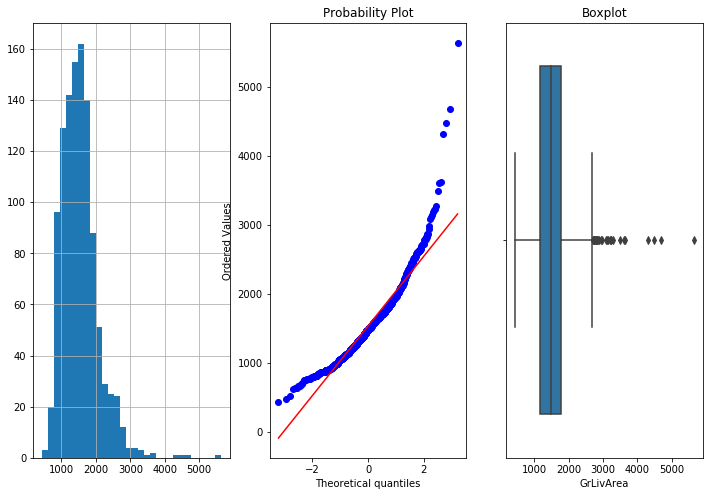

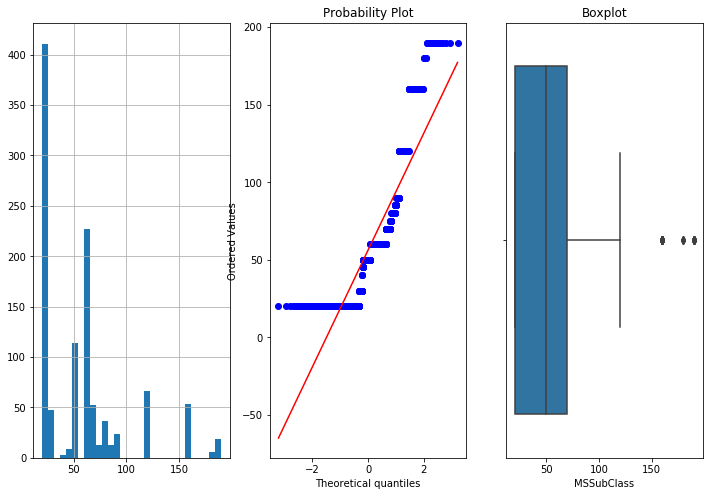

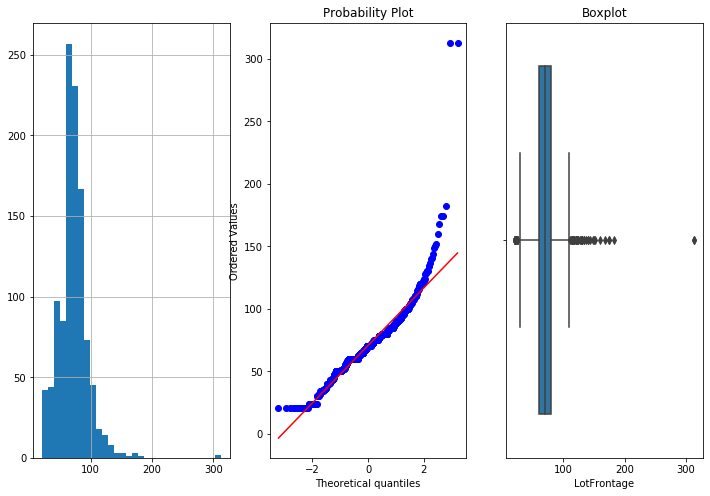

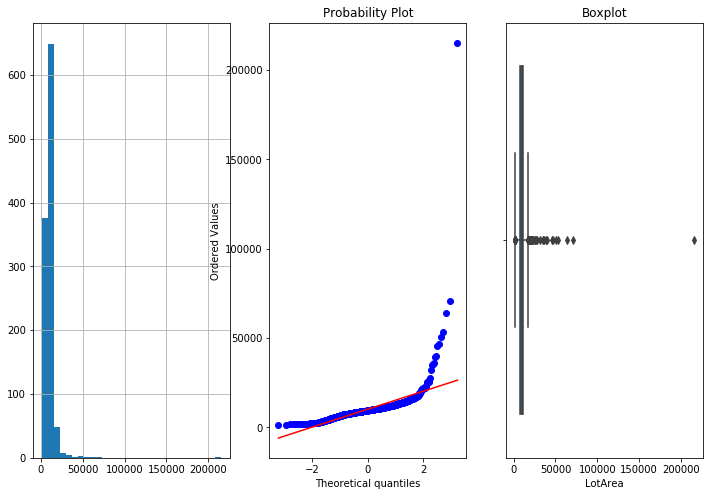

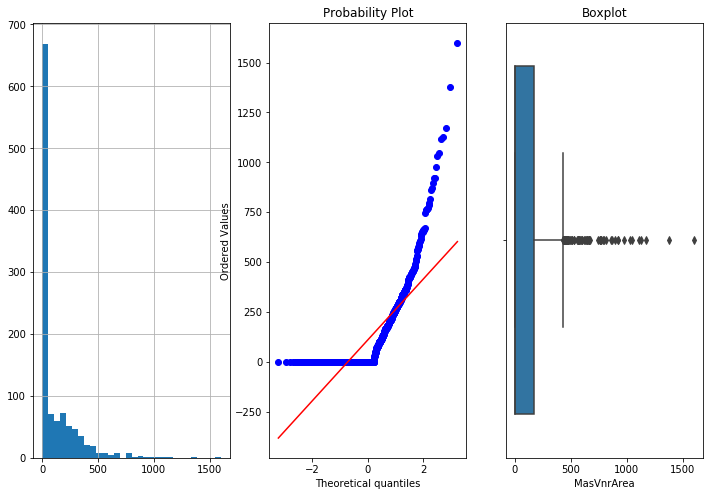

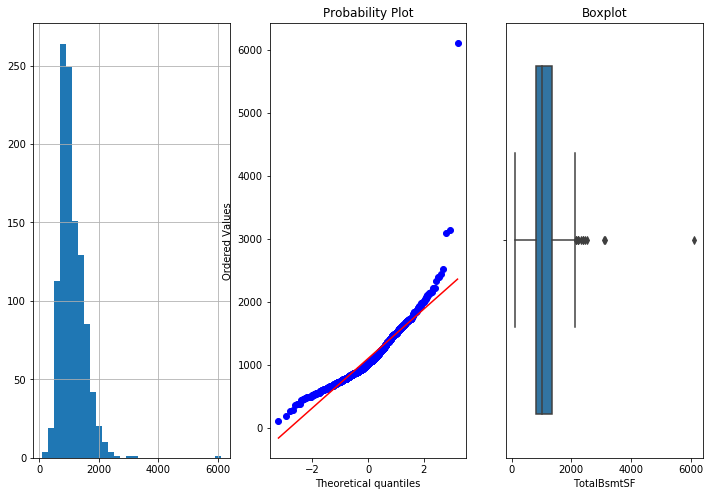

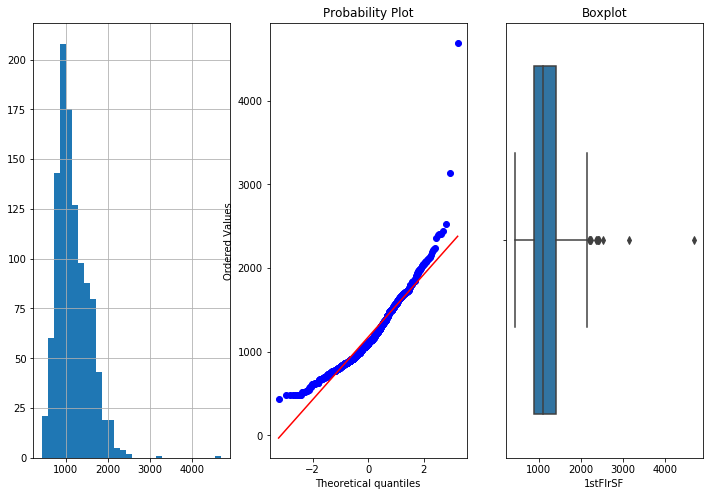

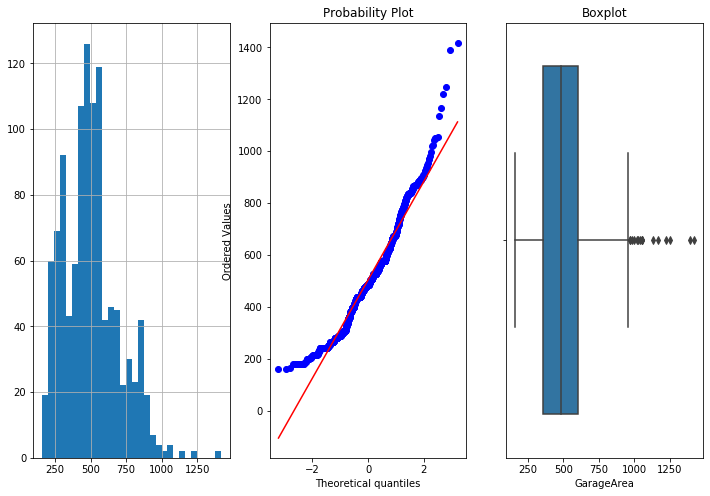

In [18]:
# looking at the features
diagnostic_plots(dataset, "GrLivArea")
diagnostic_plots(dataset, "MSSubClass")
diagnostic_plots(dataset, "LotFrontage")
diagnostic_plots(dataset, "LotArea")
diagnostic_plots(dataset, "MasVnrArea")
diagnostic_plots(dataset, "TotalBsmtSF")
diagnostic_plots(dataset, "1stFlrSF")
diagnostic_plots(dataset, "GarageArea")


In [19]:
# Removing the outliers
def outliers_removal(dataset):
    from feature_engine.outlier_removers import Winsorizer
    
    #setting the variables
    variables = list(dataset)
    winsorizer = Winsorizer(distribution= "skewed",
                           tail = "both",
                           fold = 1.5,
                           variables= variables)
    
    winsorizer.fit(dataset)
    filtered_dataset = winsorizer.transform(dataset)
    
    return filtered_dataset


dataset = outliers_removal(dataset)

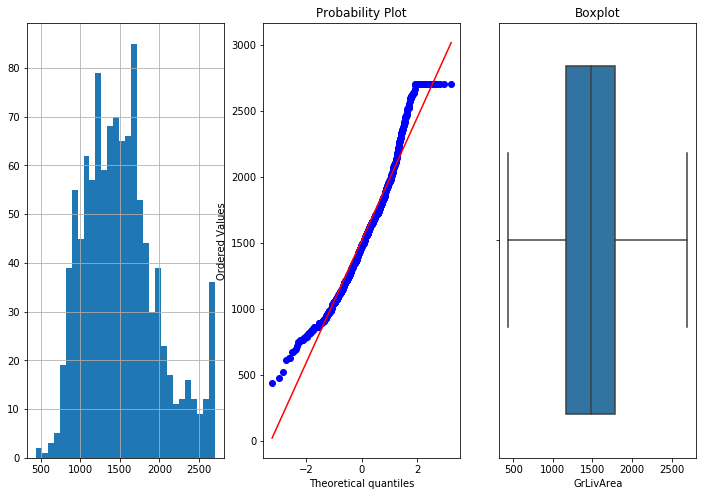

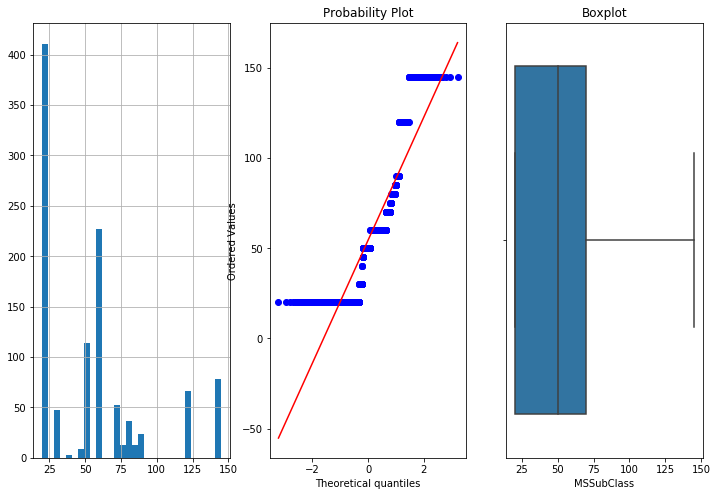

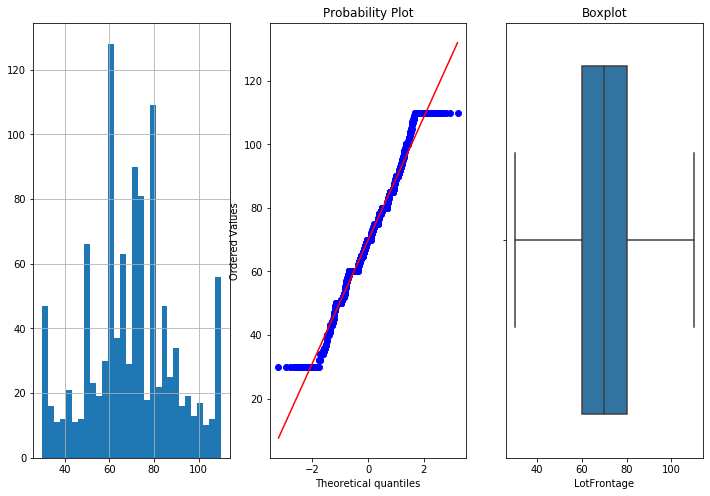

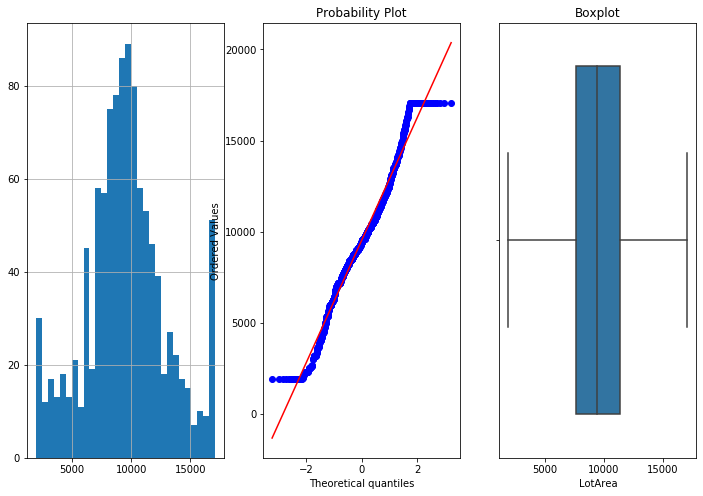

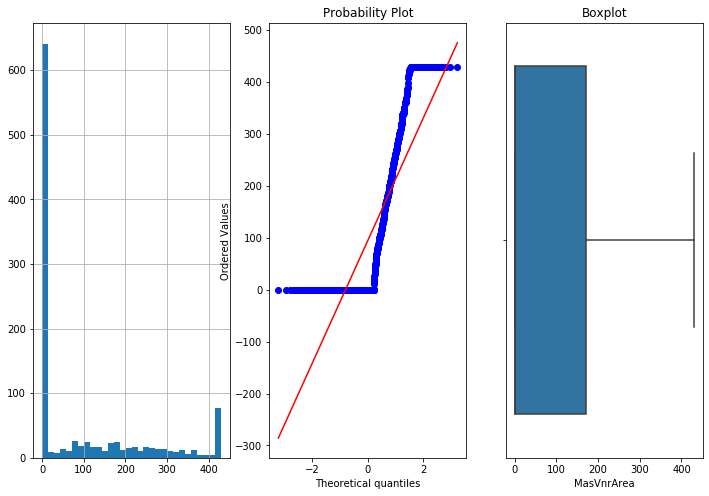

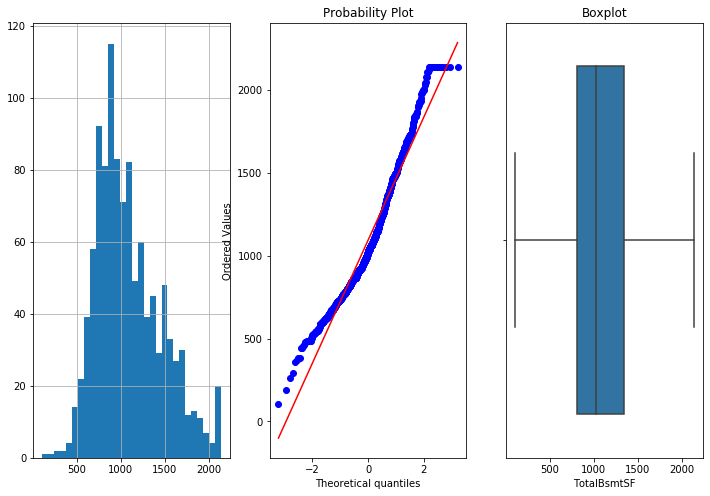

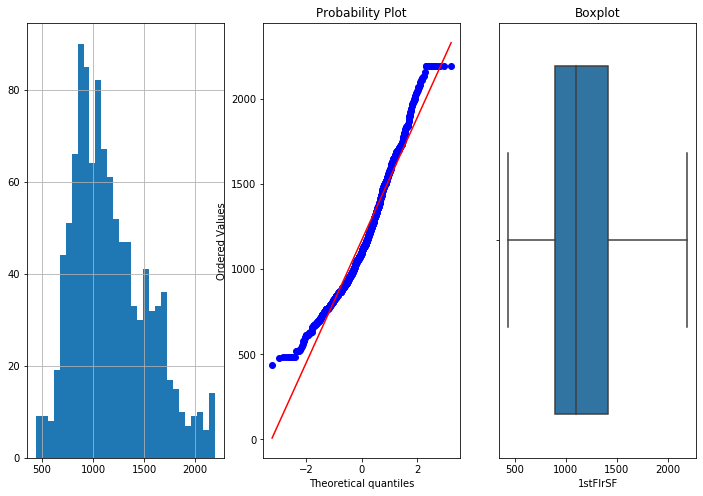

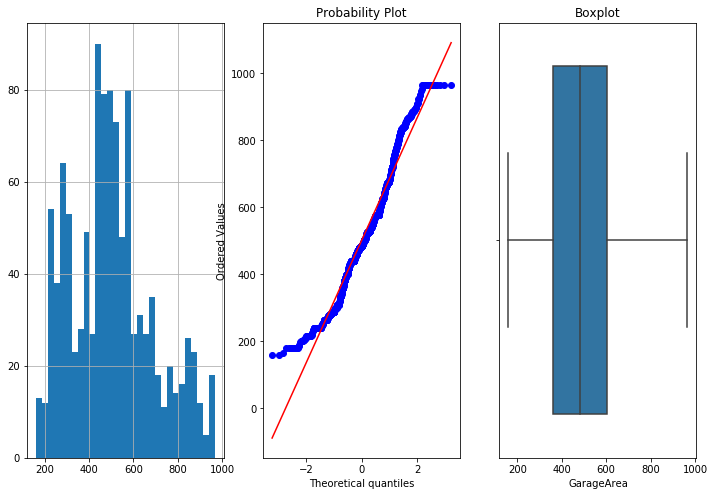

In [20]:
# Looking at the features after removing outliers
diagnostic_plots(dataset, "GrLivArea")
diagnostic_plots(dataset, "MSSubClass")
diagnostic_plots(dataset, "LotFrontage")
diagnostic_plots(dataset, "LotArea")
diagnostic_plots(dataset, "MasVnrArea")
diagnostic_plots(dataset, "TotalBsmtSF")
diagnostic_plots(dataset, "1stFlrSF")
diagnostic_plots(dataset, "GarageArea")

In [21]:
# looking at the dataset
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,0.0,65.0,8450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,2003.0,2003.0,0.0,0.0,0.0,0.0,0.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,706.0,0.0,0.0,150.0,856.0,0.0,0.0,0.0,0.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,0.0,0.0,0.0,2003.0,0.0,2.0,548.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0.0,0.0,12.247694
1,20.0,0.0,80.0,9600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,7.5,1976.0,1976.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,978.0,0.0,0.0,284.0,1262.0,0.0,0.0,0.0,0.0,1262.0,0.0,0.0,1262.0,0.0,0.0,2.0,0.0,3.0,1.0,1.0,6.0,0.0,1.0,0.0,1976.0,0.0,2.0,460.0,0.0,0.0,0.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0.0,0.0,12.109011
2,60.0,0.0,68.0,11250.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,2001.0,2002.0,0.0,0.0,0.0,0.0,0.0,162.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,486.0,0.0,0.0,434.0,920.0,0.0,0.0,0.0,0.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,6.0,0.0,1.0,0.0,2001.0,0.0,2.0,608.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,0.0,0.0,12.317167
3,70.0,0.0,60.0,9550.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,5.0,1915.0,1970.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,216.0,0.0,0.0,540.0,756.0,0.0,1.0,0.0,0.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,7.0,0.0,1.0,1.0,1998.0,1.0,3.0,642.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,0.0,0.0,11.849398
4,60.0,0.0,84.0,14260.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,655.0,0.0,0.0,490.0,1145.0,0.0,0.0,0.0,0.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,0.0,9.0,0.0,1.0,0.0,2000.0,0.0,3.0,836.0,0.0,0.0,0.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,0.0,0.0,12.429216


In [22]:
# Scalling the features of the dataset
def scalling(x):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    return x



# Feature Selection & Tests
* Correration-Coefficient
* Chi2 test
* ANOVA
* Mutual-Information
* Lasso Regression
* Tree-based Embedded methods

* Correration Feature Selection evaluates subsets of features on the basis of the following hypothesis: 
    
    "Good Features subsets contain features which are highly correrated with the target, yet uncorrerated to each other"

* Gives the Mutual Information of the Numerical Columns of the Dataset
* Thus, I will Select features which has the largest Score

Shape of Features Using for the Mutual-Information : (1094, 75)


Index(['Neighborhood', 'OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual',
       '1stFlrSF', 'GrLivArea', 'KitchenQual'],
      dtype='object')

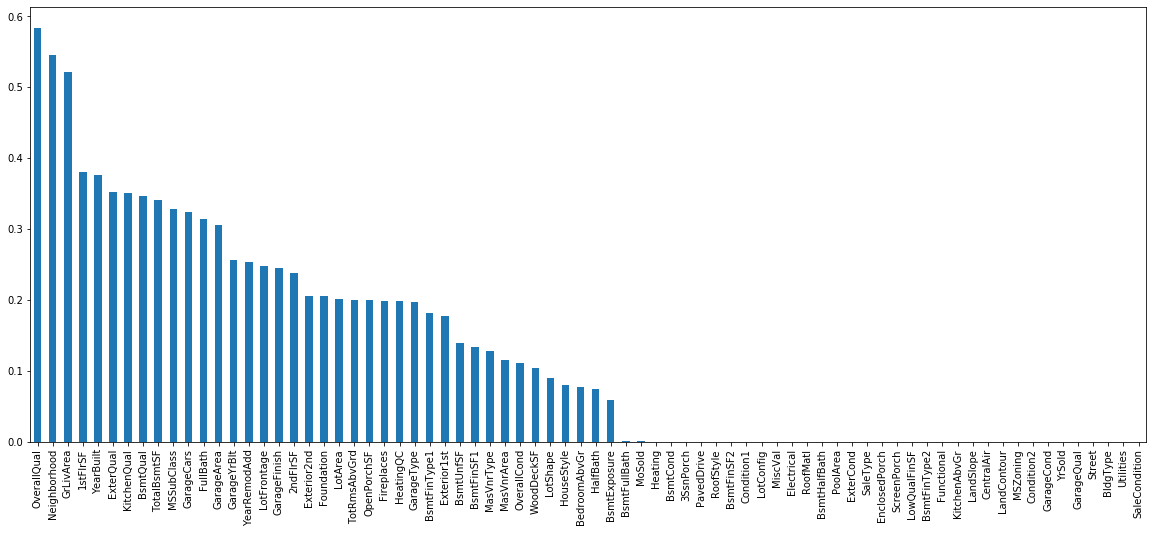

In [23]:
def mutual_information(dataset):
    
    # Choosing the numeric features
    numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
    numeric_vars = list(dataset.select_dtypes(include = numerics).columns)
    dataset = dataset[numeric_vars]
    print("Shape of Features Using for the Mutual-Information : {}".format(dataset.shape))
    
    
    # Splitting the numerical dataset into train and test set
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1],
                                                        dataset.iloc[:,-1],
                                                        test_size = 0.3,
                                                        random_state = 0)
    
    from sklearn.feature_selection import mutual_info_regression
    from sklearn.feature_selection import SelectPercentile
    
    
    mi = mutual_info_regression(x_train.fillna(0), y_train)
    mi = pd.Series(mi)
    mi.index = x_train.columns
    mi = mi.sort_values(ascending = False)

    # Plotting the Bar-plot of the dataset
    mi.sort_values(ascending = False).plot.bar(figsize = (20,8))
    
    # Selecting the best Numeric-Features
    features = SelectPercentile(mutual_info_regression, 
                                percentile = 10).fit(x_train.fillna(0), y_train)
    
    # Returning the Support of the columns of the x_train
    return x_train.columns[features.get_support()]

mutual_information(dataset)

Shape of the features using for Univariate_mse : (1094, 75)


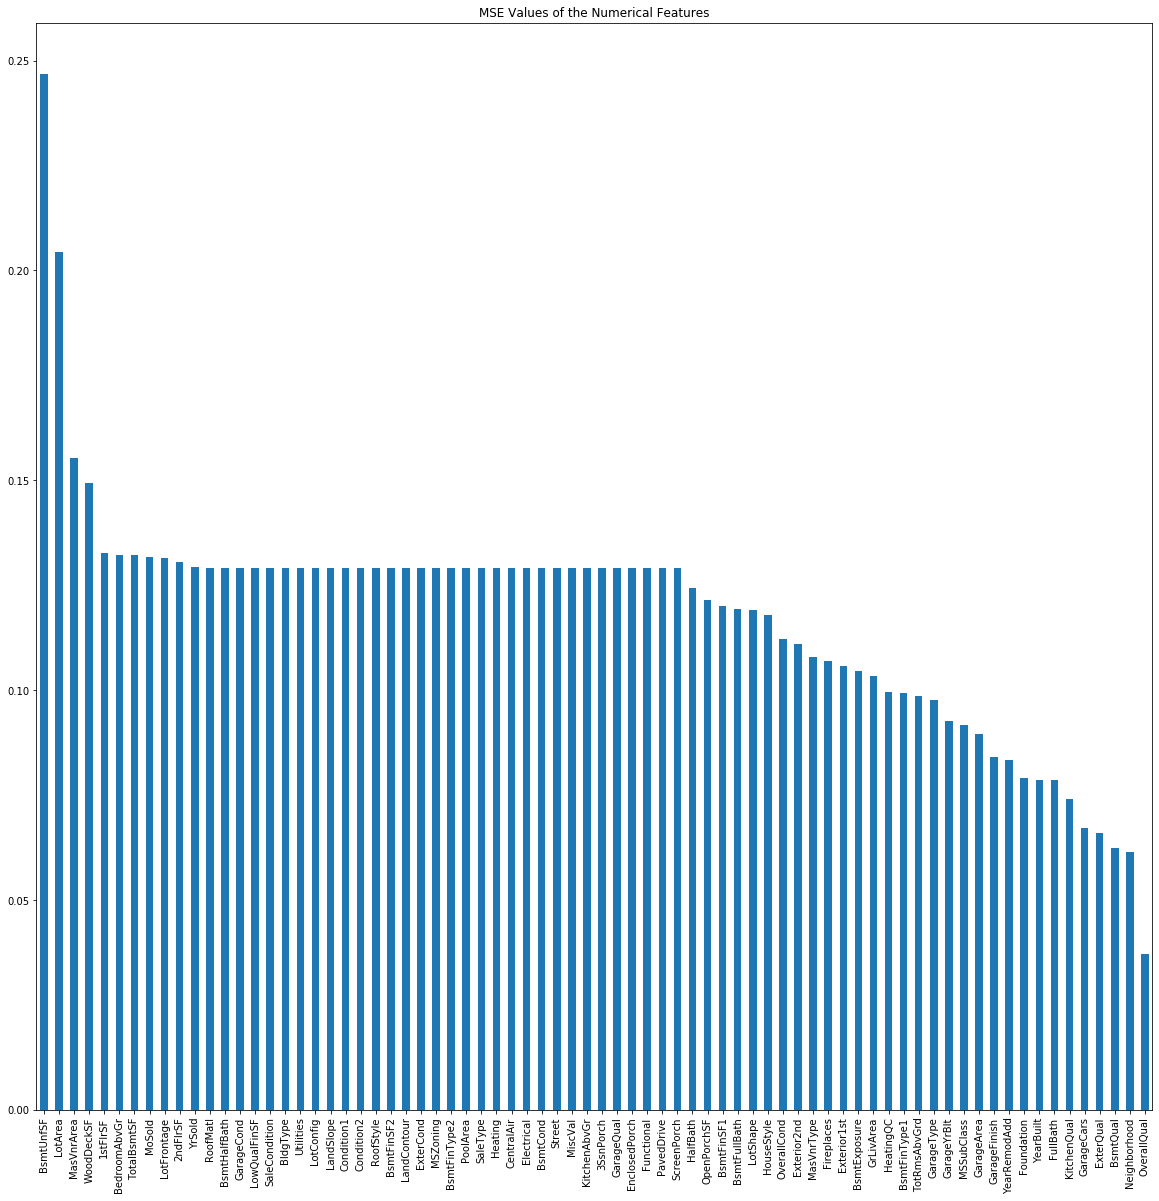

In [24]:
def univariate_mse(dataset):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error
    
    # Here I have used Decision trees, which are independent of Scalled Features
    
    # Choosing the Numerical Features
    numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
    numeric_vars = list(dataset.select_dtypes(include = numerics).columns)
    dataset = dataset[numeric_vars]
    print("Shape of the features using for Univariate_mse : {}".format(dataset.shape))
    
    # Splitting the dataset into training and test set
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1],
                                                        dataset.iloc[:,-1],
                                                        test_size = 0.3, 
                                                        random_state = 0)
    
    # Looping to build a tree, making predictions and getting the MSE 
    mse_values = []
    for feature in x_train.columns:
        classifier = DecisionTreeRegressor()
        classifier.fit(x_train[feature].fillna(0).to_frame(), y_train)
        y_preg = classifier.predict(x_test[feature].fillna(0).to_frame())
        mse_values.append(mean_squared_error(y_test, y_preg))
    
    # Converting and sorting the mse_value list
    mse_values = pd.Series(mse_values)
    mse_values.index = x_train.columns
    mse_values = mse_values.sort_values(ascending = False)
    
    # Plotting the bar plot of the mse_values
    mse_values.sort_values(ascending = False).plot.bar(figsize = (20,20))
    plt.title("MSE Values of the Numerical Features")
    plt.show()
    
univariate_mse(dataset) 

* Thus, I will Select the features with has the low MSE- Values

In [25]:
def anova(dataset):
    from sklearn.feature_selection import f_regression
    from sklearn.feature_selection import SelectPercentile
    from sklearn.model_selection import train_test_split
    
    # Choosing the only numerical features
    numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
    numeric_vars = list(dataset.select_dtypes(include = numerics).columns)
    dataset = dataset[numeric_vars]
    print("Shape of the features using for Anova test : {}".format(dataset.shape))
    
    # Splitting the dataset into training and test set
    x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1],
                                                        dataset.iloc[:,-1],
                                                        test_size = 0.3,
                                                        random_state = 0)
    
    # Calculating and sorting the dataset
    anova_test = f_regression(x_train.fillna(0), y_train)
    anova_test = pd.Series(anova_test)
    anova_test.index = x_train.columns
    anova_test = anova_test.sort_values(ascending = False)
    
    # Plotting the bar plot of the Univariate test : Anova
    anova_test.sort_values(ascending = False).plot.bar(figsize = (12,8))
    plt.title("ANOVA test: P-Value of different Features")
    plt.show()
    
    # Feature Selection
    features = SelectPercentile(f_regression, percentile = 10).fit(
                                                    x_train.fillna(0), y_train)
    x_train.columns[features.get_support()]
    
    
#anova(dataset)    

In [ ]:
# Removing Features with L1 penalty
def lasso_regulization(dataset):
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    
    # Choosing the numics features
    numeric = ["int16", "int32", "int64", "float16", "float32", "float64"]
    numerical_variables = list(dataset.select_dtypes(include = numeric).columns)
    dataset = dataset[numerical_variables]
    print("Shape of the features using for the Lasso : {}".format(dataset.shape))
    
    
    # Splitting the dataset into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1],
                                                        dataset.iloc[:,-1],
                                                        test_size = 0.3,
                                                        random_state = 0)
    
    
    # Scalling the training set 
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x_train.fillna(0))
    
    # Selecting the best features
    features = SelectFromModel(Lasso(alpha = 100))  # Setting the *high penalty*
    features.fit(scaler.transform(x_train.fillna(0)), y_train)
    selected_features = x_train.columns[(features.get_support())]
    
    # Printing the features
    print("Total features in dataset : {}".format(x_train.shape[1]))
    print("Selected features by Lasso : {}".format(len(selected_features)))
    print("feature where Coefficient shrinks to 0 : {}".format(
                                        np.sum(features._estimator_.coef_ == 0)))
    
    

In [26]:
# splitting the dataset into independent(x) and dependent variables
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# printing the types of x and y
print("Type of our Independent Features : " , type(x))
print("Type of our Dependent Features : ", type(y))

# printing the shape of x and y
print("Shape of our Indedepent Features :  ", x.shape) 
print("Shape of our Dependent Features : " , y.shape)

# Scalling the x
x = scalling(x)

Type of our Independent Features :  <class 'numpy.ndarray'>
Type of our Dependent Features :  <class 'numpy.ndarray'>
Shape of our Indedepent Features :   (1094, 74)
Shape of our Dependent Features :  (1094,)


# Model Building
* Metric Function
* Machine Learning Model + Artificail Neural Networks

In [27]:
# Making the Metric function
def metric(y_test, y_preg):
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import median_absolute_error
    
    # Accessing the metrics
    mean_error = mean_squared_error(y_test, y_preg)
    root_mean_squared_error = np.sqrt(mean_error)
    score = r2_score(y_test, y_preg)
    absolute_error = mean_absolute_error(y_test, y_preg)
    median_error = median_absolute_error(y_test, y_preg)
    
    # Printing the Scores of various metrics
    print("Mean-Squared-Error : {}".format(mean_error))
    print("Root-Mean-Squared-Error : {}".format(root_mean_squared_error))
    print("Score : {}".format(score))
    print("Mean-Absolute-Error : {}".format(absolute_error))
    print("Median-Absolute-Error : {}".format(median_error))
    
    # Visualising the Result
    plt.figure(figsize = (12,8))
    ax1 = sns.distplot(y_test, color= "r", hist= False, label= "Test Distribution")
    ax2 = sns.distplot(y_preg, color= "b", hist= False, label= "Predicted Distribution")
    plt.legend()
    plt.title("Test Vs Predicted Distribution")
    plt.show()
    

In [28]:
# Splitting the dataset into Training and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)


Parameters to be tune : dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])
Best Hyperparameters Used : {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}
Mean-Squared-Error : 0.015618629469014673
Root-Mean-Squared-Error : 0.1249745152781745
Score : 0.878378993367548
Mean-Absolute-Error : 0.08748921486671862
Median-Absolute-Error : 0.06580839401629923


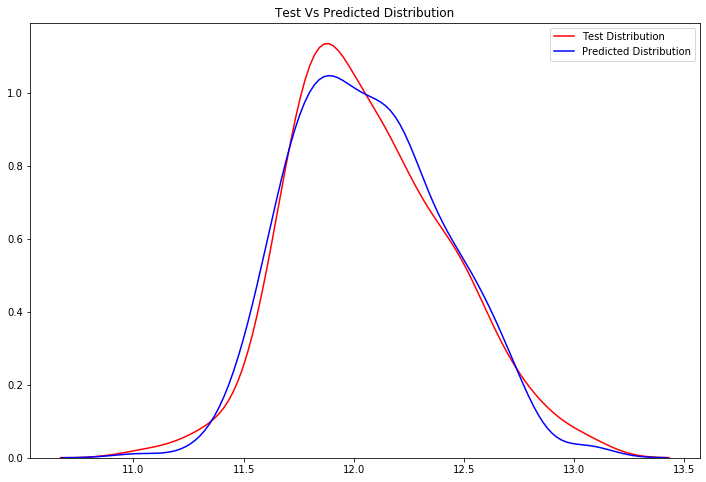

In [32]:
# Setting the Linear Regression
def multiple_regression(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import GridSearchCV
    regressor = LinearRegression()
    
    # Parameters to tune
    print("Parameters to be tune : {}".format(LinearRegression().get_params().keys()))
    
    # Setting the params
    params = {"copy_X" : [True, False],
              "fit_intercept" : [True, False],
              "n_jobs" : [-1],
              "normalize" : [True, False]}
    
    grid = GridSearchCV(regressor, params, cv = 5) 
    grid.fit(x_train, y_train)
    y_preg = grid.predict(x_test)
    
    # Displaying the best hyperparameters used for the result
    print("Best Hyperparameters Used : {}".format(grid.best_params_))
    
    # Setting the metric
    result = metric(y_test, y_preg)
    
    #### Will use Embedded method for that particular model
    
multiple_regression(x_train, x_test, y_train, y_test)

In [34]:
# Setting the Support Vectors
def support_vectors_machine(x_train, x_test, y_train, y_test):
    from sklearn.svm import SVR
    from sklearn.model_selection import GridSearchCV
    regressor = SVR()
    
    # Hyper-Parameters to be tune: 
    print("Hyper-Parameters to be tune : {}".format(SVR().get_params()))
    
    # Setting the params
    params = {"C" : [0.1, 1, 10, 100, 1000],
              "gamma" : [1, 0.1, 0.01, 0.001, 0.0001],
              "kernel" : ["rbf", "linear"]} 
    
    grid = GridSearchCV(SVR(), params, cv= 5)
    grid.fit(x_train, y_train)
    y_preg = grid.predict(x_test)
    
    # Displaying the best hyperparametrs used for the model
    print("Best Hyper-Parameters used : {}".format(grid.best_params_))
    
    # Setting the metric
    result = metric(y_test, y_preg)
    
     #### Will use Embedded method for that particular model
    
#support_vectors_machine(x_train, x_test, y_train, y_test)

# High Compexity: Will Reduce the number of dimentions from PCA or Select a set{} from the features

In [35]:
# Setting the tree
def decision_tree(x_train, x_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import GridSearchCV
    regressor = DecisionTreeRegressor()
    
    # Parameters to be tune
    print("Hyper-Parameters to be tune : {}".format(DecisionTreeRegressor().get_params().keys()))
    
    # Setting the params
    params = {"criterion" : ["gini", "entropy"],
              "max_depth" : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    
    grid = GridSearchCV(regressor, params, cv = 3)
    grid.fit(x_train, y_train)
    y_preg = grid.predict(x_test)
    
    # Displaying the best hyperameters used
    print("Best Hyper-Parameters used : {}".format(grid.best_params_))
    
    # Setting the Metricc
    result = metric(y_test, y_preg)
    
     #### Will use Embedded method for that particular model
    
#decision_tree(x_train, x_test, y_train, y_test)

In [37]:
# Setting the Forest
def random_forest(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    regressor = RandomForestRegressor()
    
    # Parameters to be tune
    print("Hyper-Parameters to be tune : {}".format(RandomForestRegressor().get_params().keys()))
    
    # Setting the params
    params = {"n_estimators" : [5,10,15],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth" : [3,4,5],
              "criterion" : ["gini", "entropy"]}
    
    grid = GridSearchCV(regressor, params, cv = 3)
    grid.fit(x_train, y_train)
    y_preg = grid.predict(x_test)
    
    # Displaying the best hyperameters used
    print("Best Hyper-Parameters used : {}".format(grid.best_params_))
    
    # Setting the Metric
    result = metric(y_test, y_preg)
    
     #### Will use Embedded method for that particular model
    
#random_forest(x_train, x_test, y_train, y_test)

In [38]:
# Setting the XGBoost
def XGBoost(x_train, x_test, y_train, y_test):
    from xgboost import XGBRegressor
    
    # Tunning the parameters of the XGBoost_Regressor
    boost_regressor = XGBRegressor(colsample_bytree = 0.2,
                                   gamma = 0.0, 
                                   max_depth = 6,
                                   min_child_weight = 1.5,
                                   n_estimators = 7200,
                                   reg_alpha = 0.9, 
                                   reg_lambda = 0.6, 
                                   subsample = 0.2,
                                   seed = 32, 
                                   silent = 1)
    

In [40]:
# Removing Features with L1 penalty
#**********************************ERROR**************************************#
def lasso_regulization(dataset):
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    
    # Choosing the numics features
    numeric = ["int16", "int32", "int64", "float16", "float32", "float64"]
    numerical_variables = list(dataset.select_dtypes(include = numeric).columns)
    dataset = dataset[numerical_variables]
    print("Shape of the features using for the Lasso : {}".format(dataset.shape))
    
    
    # Splitting the dataset into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1],
                                                        dataset.iloc[:,-1],
                                                        test_size = 0.3,
                                                        random_state = 0)
    
    
    # Scalling the training set 
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x_train.fillna(0))
    
    # Selecting the best features
    features = SelectFromModel(Lasso(alpha = 100))  # Setting the *high penalty*
    features.fit(scaler.transform(x_train.fillna(0)), y_train)
    selected_features = x_train.columns[(features.get_support())]
    
    
    # Printing the features
    print("Total features in dataset : {}".format(x_train.shape[1]))
    print("Selected features by Lasso : {}".format(len(selected_features)))
    print("feature where Coefficient shrinks to 0 : {}".format(
                                        np.sum(features._estimator_.coef_ == 0)))
    
    # Visualization of Lasso
    
    
#lasso_regulization(dataset)

#****************************************************************************#
